In [67]:
# Dependencies
import pandas as pd
from pathlib import Path
from dateutil import parser
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn as skl

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

In [68]:
# Store filepath in a variable
file_one = Path("Resources\historical-property-sales-data.csv")

In [69]:
# Read our data file with the Pandas library
# Not every CSV requires an encoding, but be aware this can come up
properties_original_df = pd.read_csv(file_one, encoding="ISO-8859-1")
properties_original_df.head()

,ï»¿PropertyID,PropType,taxkey,Address,CondoProject,District,nbhd,Style,Extwall,Stories,Year_Built,Rooms,FinishedSqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
0,862416.0,Commercial,5370701000,115 W OKLAHOMA AV,NaN,14.0,6440.0,Fast Food Operation,Alum/Vynyl Siding,1.0,2000.0,NaN,"3,229",1,NaN,0.0,0.0,"1,703,065,320",12/23/2020,"$2,150,000"
1,862062.0,Commercial,6269997114,151 W LAYTON AV,NaN,13.0,6440.0,Fast Food Operation,Concrete Block,1.0,1968.0,NaN,"1,980",1,NaN,0.0,0.0,"457,380,000",12/23/2020,"$1,200,000"
2,870290.0,Commercial,330432000,9050-9100 N SWAN RD,NaN,9.0,6202.0,Day Care Center,NaN,1.0,2000.0,NaN,"34,100",1,NaN,0.0,0.0,"2,238,984",5/7/2021,"$1,500,000"
3,98508.0,Residential,49980110,9327 N SWAN RD,NaN,9.0,40.0,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0.0,0.0,1341648,2022-01-07,800000
4,NaN,Vacant Land,369999400,9201R N 107TH ST,NaN,9.0,6411.0,Commercial Land,NaN,0.0,0.0,0.0,0,1,0.0,0.0,0.0,1090307,2015-11-01,790000


In [70]:
properties_original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56048 entries, 0 to 56047
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ï»¿PropertyID  32048 non-null  float64
 1   PropType       56040 non-null  object 
 2   taxkey         56048 non-null  int64  
 3   Address        56044 non-null  object 
 4   CondoProject   9142 non-null   object 
 5   District       56046 non-null  float64
 6   nbhd           55991 non-null  float64
 7   Style          55957 non-null  object 
 8   Extwall        45621 non-null  object 
 9   Stories        55879 non-null  float64
 10  Year_Built     55987 non-null  float64
 11  Rooms          54418 non-null  float64
 12  FinishedSqft   55947 non-null  object 
 13  Units          56048 non-null  int64  
 14  Bdrms          54419 non-null  float64
 15  Fbath          55393 non-null  float64
 16  Hbath          51208 non-null  float64
 17  Lotsize        56048 non-null  object 
 18  Sale_d

In [71]:
#getting only 'Residential' values
residential_properties_df = properties_original_df.loc[properties_original_df["PropType"] == 'Residential']
residential_properties_df = residential_properties_df.drop(columns=['CondoProject', 'ï»¿PropertyID','PropType','District','Extwall','nbhd','Stories','taxkey','Address','Rooms','Year_Built','Units'], axis=1)
residential_properties_df.isnull().sum()

Style             87
FinishedSqft      90
Bdrms            128
Fbath             10
Hbath           3610
Lotsize            0
Sale_date          0
Sale_price         8
dtype: int64

In [72]:
filtered_residential_properties_df = residential_properties_df.copy()

Trying the data out without filtering out the styles, but instead filtering on bedrooms and price ranges later on

In [73]:
# styles_list = ['Cape Cod','Colonial','Bi-Level','Duplex N/S','Townhouse','Dplx Bungalow','Milwaukee Bungalow','Split Level','Res O/S A & 1/2','Res O/S 2sty +','Res O/S 1 Story','Duplex O/S','Triplex','Tudor','Contemporary','Mansion','Rm or Rooming House']
# filtered_residential_properties_df = residential_properties_df[residential_properties_df['Style'].isin(styles_list)]
# filtered_residential_properties_df = filtered_residential_properties_df.drop('Style', axis=1)
# filtered_residential_properties_df

In [74]:
#check datatype of each column
filtered_residential_properties_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43638 entries, 3 to 56003
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Style         43551 non-null  object 
 1   FinishedSqft  43548 non-null  object 
 2   Bdrms         43510 non-null  float64
 3   Fbath         43628 non-null  float64
 4   Hbath         40028 non-null  float64
 5   Lotsize       43638 non-null  object 
 6   Sale_date     43638 non-null  object 
 7   Sale_price    43630 non-null  object 
dtypes: float64(3), object(5)
memory usage: 3.0+ MB


In [75]:
filtered_residential_properties_df['Baths_total'] = filtered_residential_properties_df['Fbath'] + filtered_residential_properties_df['Hbath']
filtered_residential_properties_df = filtered_residential_properties_df.drop(columns=['Fbath','Hbath'], axis=1)
filtered_residential_properties_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43638 entries, 3 to 56003
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Style         43551 non-null  object 
 1   FinishedSqft  43548 non-null  object 
 2   Bdrms         43510 non-null  float64
 3   Lotsize       43638 non-null  object 
 4   Sale_date     43638 non-null  object 
 5   Sale_price    43630 non-null  object 
 6   Baths_total   40023 non-null  float64
dtypes: float64(2), object(5)
memory usage: 2.7+ MB


In [76]:
filtered_residential_properties_df['Sale_date'] = pd.to_datetime(filtered_residential_properties_df['Sale_date'], infer_datetime_format=True, format='mixed')
filtered_residential_properties_df['Year'] = filtered_residential_properties_df['Sale_date'].dt.year
filtered_residential_properties_df['Month'] = filtered_residential_properties_df['Sale_date'].dt.month
filtered_residential_properties_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43638 entries, 3 to 56003
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Style         43551 non-null  object        
 1   FinishedSqft  43548 non-null  object        
 2   Bdrms         43510 non-null  float64       
 3   Lotsize       43638 non-null  object        
 4   Sale_date     43638 non-null  datetime64[ns]
 5   Sale_price    43630 non-null  object        
 6   Baths_total   40023 non-null  float64       
 7   Year          43638 non-null  int32         
 8   Month         43638 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(2), object(4)
memory usage: 3.0+ MB


C:\Users\Ajunjee Selvam\AppData\Local\Temp\ipykernel_14228\3724813437.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  filtered_residential_properties_df['Sale_date'] = pd.to_datetime(filtered_residential_properties_df['Sale_date'], infer_datetime_format=True, format='mixed')


In [77]:
filtered_residential_properties_df=filtered_residential_properties_df.dropna(subset=['Bdrms','Baths_total','Sale_price'])
filtered_residential_properties_df.isnull().sum()

Style           0
FinishedSqft    0
Bdrms           0
Lotsize         0
Sale_date       0
Sale_price      0
Baths_total     0
Year            0
Month           0
dtype: int64

In [78]:
filtered_residential_properties_df['Style'] = filtered_residential_properties_df['Style'].astype(str)
filtered_residential_properties_df['Sale_price'] = filtered_residential_properties_df['Sale_price'].astype(str)
filtered_residential_properties_df['Sale_price'] = filtered_residential_properties_df['Sale_price'].str.replace('$', '')
filtered_residential_properties_df['Sale_price'] = filtered_residential_properties_df['Sale_price'].str.replace(',', '')
filtered_residential_properties_df['Sale_price'] = pd.to_numeric(filtered_residential_properties_df['Sale_price']).astype(int)

filtered_residential_properties_df['Bdrms'] = pd.to_numeric(filtered_residential_properties_df['Bdrms']).astype(int)
filtered_residential_properties_df['Baths_total'] = pd.to_numeric(filtered_residential_properties_df['Baths_total']).astype(int)


filtered_residential_properties_df['FinishedSqft'] = filtered_residential_properties_df['FinishedSqft'].str.replace(',', '')
filtered_residential_properties_df['FinishedSqft'] = pd.to_numeric(filtered_residential_properties_df['FinishedSqft']).astype(int, errors='ignore')

# filtered_residential_properties_df['Lotsize'] = filtered_residential_properties_df['Lotsize'].str.replace(',', '')
# filtered_residential_properties_df['Lotsize'] = pd.to_numeric(filtered_residential_properties_df['Lotsize']).astype(int, errors='ignore')

In [79]:
filtered_residential_properties_df.isnull().sum()

Style           0
FinishedSqft    0
Bdrms           0
Lotsize         0
Sale_date       0
Sale_price      0
Baths_total     0
Year            0
Month           0
dtype: int64

In [80]:
filtered_residential_properties_df=filtered_residential_properties_df.dropna(subset=['FinishedSqft'])
filtered_residential_properties_df = filtered_residential_properties_df.drop(filtered_residential_properties_df[(filtered_residential_properties_df['Bdrms'] == 0) | (filtered_residential_properties_df['Baths_total'] == 0) | (filtered_residential_properties_df['Sale_price'] == 0)].index)
filtered_residential_properties_df.isnull().sum()

Style           0
FinishedSqft    0
Bdrms           0
Lotsize         0
Sale_date       0
Sale_price      0
Baths_total     0
Year            0
Month           0
dtype: int64

In [81]:
filtered_residential_properties_df['FinishedSqft'] = pd.to_numeric(filtered_residential_properties_df['FinishedSqft']).astype(int)
# filtered_residential_properties_df['Lotsize'] = pd.to_numeric(filtered_residential_properties_df['Lotsize']).astype(int)
filtered_residential_properties_df = filtered_residential_properties_df[['Style','Bdrms','Baths_total', 'FinishedSqft', 'Sale_date','Year', 'Month', 'Sale_price']]
filtered_residential_properties_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39869 entries, 79 to 56002
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Style         39869 non-null  object        
 1   Bdrms         39869 non-null  int32         
 2   Baths_total   39869 non-null  int32         
 3   FinishedSqft  39869 non-null  int32         
 4   Sale_date     39869 non-null  datetime64[ns]
 5   Year          39869 non-null  int32         
 6   Month         39869 non-null  int32         
 7   Sale_price    39869 non-null  int32         
dtypes: datetime64[ns](1), int32(6), object(1)
memory usage: 1.8+ MB


In [82]:
filtered_residential_properties_df.head()

,Style,Bdrms,Baths_total,FinishedSqft,Sale_date,Year,Month,Sale_price
79,Ranch,3,2,1884,2023-01-23,2023,1,349000
80,Tudor,3,4,3328,2022-08-18,2022,8,2500000
81,Tudor,3,4,3328,2017-08-01,2017,8,1391000
92,Ranch,3,2,2104,2022-09-13,2022,9,200000
144,Colonial,4,2,2200,2021-11-23,2021,11,336000


In [83]:
filtered_residential_properties_df = filtered_residential_properties_df[(filtered_residential_properties_df['Bdrms'] < 6) & (filtered_residential_properties_df['Bdrms'] > 1) & (filtered_residential_properties_df['Baths_total'] > 0) &  (filtered_residential_properties_df['Baths_total'] < 8) &  (filtered_residential_properties_df['FinishedSqft'] < 3000)]
filtered_residential_properties_df.head()

,Style,Bdrms,Baths_total,FinishedSqft,Sale_date,Year,Month,Sale_price
79,Ranch,3,2,1884,2023-01-23,2023,1,349000
92,Ranch,3,2,2104,2022-09-13,2022,9,200000
144,Colonial,4,2,2200,2021-11-23,2021,11,336000
150,Ranch,3,2,1585,2023-11-21,2023,11,233000
179,Res O/S 1 Story,2,2,1125,2021-10-08,2021,10,250000


In [84]:
filtered_residential_properties_df.describe()[['Bdrms']]

,Bdrms
count,35316.000000
mean,3.245271
min,2.000000
25%,3.000000
50%,3.000000
75%,4.000000
max,5.000000
std,0.766705


In [85]:
filtered_residential_properties_df.describe()[['Baths_total']]

,Baths_total
count,35316.000000
mean,1.767443
min,1.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,6.000000
std,0.646427


In [86]:
filtered_residential_properties_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35316 entries, 79 to 56002
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Style         35316 non-null  object        
 1   Bdrms         35316 non-null  int32         
 2   Baths_total   35316 non-null  int32         
 3   FinishedSqft  35316 non-null  int32         
 4   Sale_date     35316 non-null  datetime64[ns]
 5   Year          35316 non-null  int32         
 6   Month         35316 non-null  int32         
 7   Sale_price    35316 non-null  int32         
dtypes: datetime64[ns](1), int32(6), object(1)
memory usage: 1.6+ MB


In [87]:
filtered_residential_properties_df.to_csv("Resources\cleaned-property-sales-data2.csv", encoding='utf-8',index=False)

REMOVING UPPER RANGE DUE TO HIGH PRICE PREDICTIONS

In [88]:
#try to find outliers
filtered_residential_properties_df.describe()[['Sale_price']]

,Sale_price
count,3.531600e+04
mean,1.590013e+05
min,3.500000e+03
25%,1.060000e+05
50%,1.499000e+05
75%,2.000000e+05
max,1.609000e+06
std,7.942079e+04


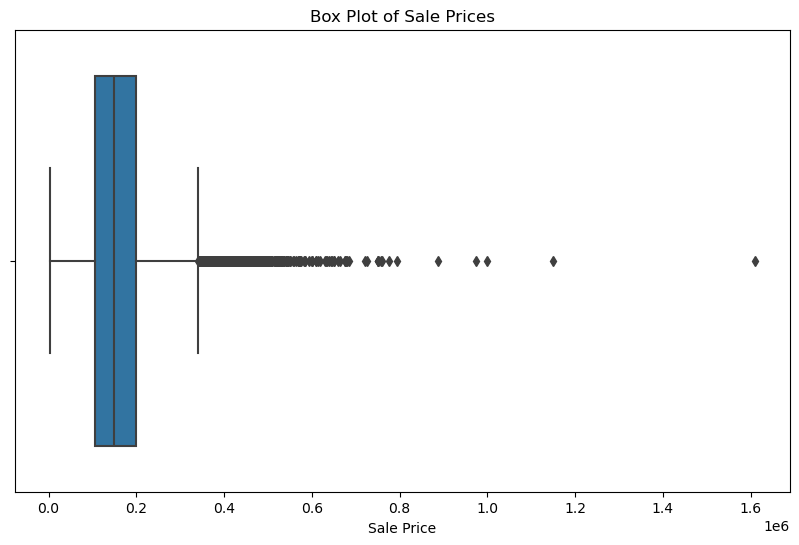

In [89]:
# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_residential_properties_df['Sale_price'])
plt.title('Box Plot of Sale Prices')
plt.xlabel('Sale Price')
plt.show()

In [90]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = filtered_residential_properties_df['Sale_price'].quantile(0.25)
Q3 = filtered_residential_properties_df['Sale_price'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate the lower and upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_no_outliers = filtered_residential_properties_df[(filtered_residential_properties_df['Sale_price'] >= 80000) & (filtered_residential_properties_df['Sale_price'] <= 800000)]


# Display the DataFrame without outliers
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30467 entries, 79 to 56002
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Style         30467 non-null  object        
 1   Bdrms         30467 non-null  int32         
 2   Baths_total   30467 non-null  int32         
 3   FinishedSqft  30467 non-null  int32         
 4   Sale_date     30467 non-null  datetime64[ns]
 5   Year          30467 non-null  int32         
 6   Month         30467 non-null  int32         
 7   Sale_price    30467 non-null  int32         
dtypes: datetime64[ns](1), int32(6), object(1)
memory usage: 1.4+ MB


In [91]:
print(lower_bound)
print(upper_bound)
print(df_no_outliers.sort_values(['Sale_price']))

-35000.0
341000.0
                    Style  Bdrms  Baths_total  FinishedSqft  Sale_date  Year  \
37509  Milwaukee Bungalow      4            2          1414 2023-06-05  2023   
25052  Milwaukee Bungalow      4            1          1430 2014-02-01  2014   
37855          Duplex O/S      4            2          1869 2018-08-01  2018   
37850            Colonial      3            1          1152 2018-04-01  2018   
25224  Milwaukee Bungalow      5            2          1803 2022-10-31  2022   
...                   ...    ...          ...           ...        ...   ...   
12067            Colonial      4            4          2626 2022-03-09  2022   
14430            Colonial      3            4          2122 2023-11-07  2023   
10366               Tudor      5            4          2817 2023-06-16  2023   
14717            Colonial      3            3          2389 2020-07-08  2020   
23679            Colonial      4            3          2393 2022-08-05  2022   

       Month  Sale_pr

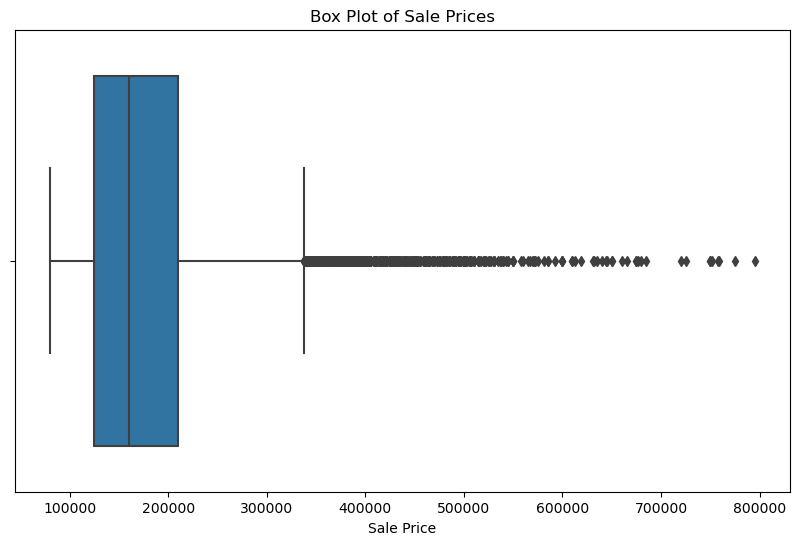

In [92]:
# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_no_outliers['Sale_price'])
plt.title('Box Plot of Sale Prices')
plt.xlabel('Sale Price')
plt.show()

In [93]:
df_no_outliers.describe()[['Sale_price']]

,Sale_price
count,30467.000000
mean,175465.860603
min,80000.000000
25%,125000.000000
50%,160000.000000
75%,210000.000000
max,795000.000000
std,71328.511343


In [94]:
df_no_outliers.to_csv("Resources\cleaned-property-sales-data_no-outliers2.csv")